In [148]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [149]:
# load dataset
df = pd.read_csv(r"C:/Users/Tanmoy/Desktop/Projects/Credit Card Fraud Detection/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [150]:
# checking information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [151]:
# missing values/null values count
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [152]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

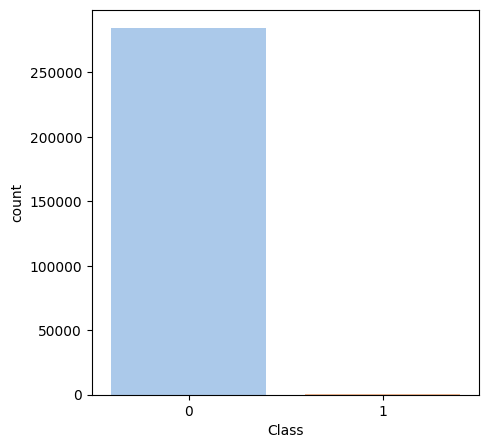

In [153]:
# countplot
plt.figure(figsize=(5,5))
fg=sns.countplot(x='Class',data=df,palette="pastel")
plt.show(fg)

In [154]:
classes = df['Class'].value_counts()
normal_value = round(classes[0]/df['Class'].count()*100,2)
fraud_values = round(classes[1]/df['Class'].count()*100,2)
print(normal_value)
print(fraud_values)

99.83
0.17


In [155]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


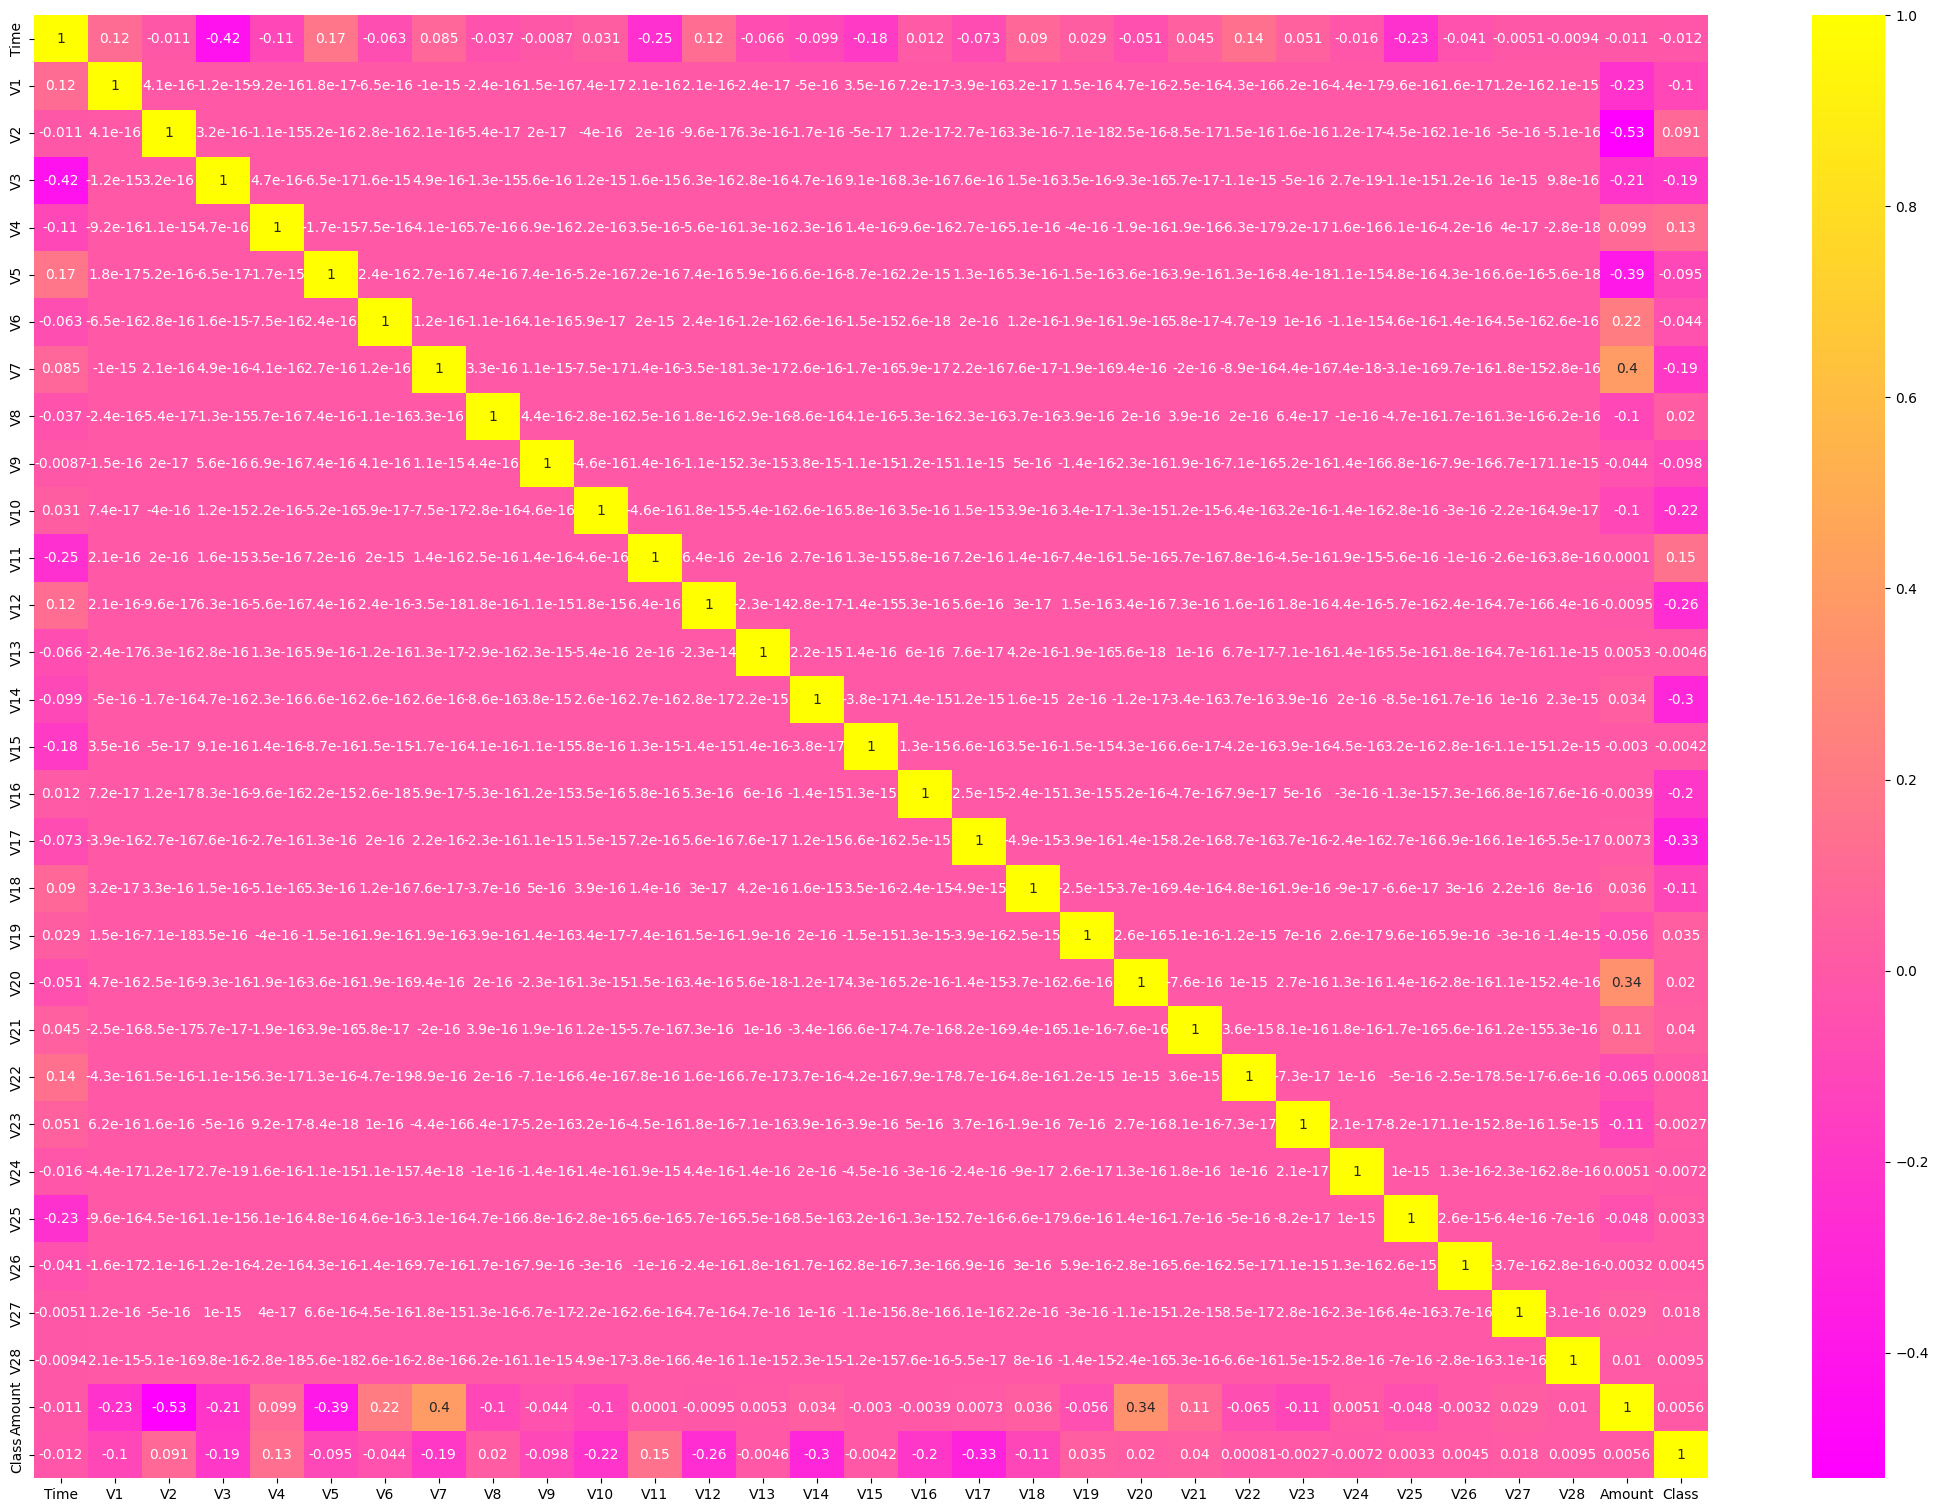

In [156]:
# plotting the heatmap for the correlation
plt.figure(figsize=(27,19))
sns.heatmap(corr, cmap = 'spring', annot= True )
plt.show()

In [157]:
# separte the data according to type of transaction
legit = df[df.Class == 0]
fraud = df[df.Class==1]

In [158]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [159]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [160]:
df.groupby('Class').describe()

Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                                 V1            ...       V28             \
            75%       max     count      mean  ...       75%        max   
Class                                          ...                        
0      139333.0  172792.0  284315.0  0.008258  ...  0.077962  33.847808   
1      128483.0  170348.0     492.0 -4.771948  ...  0.381152   1.779364   

         Amount                                                              
          count        mean         std  min   25%    50%     75%       max  
Class                                                                        
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16  
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87  

[2 rows x 240 columns]

In [161]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [162]:
# the mean amount spent for fraud transactions is actually more than for the legit ones

In [163]:
# balance the data for legit and fraud transaction value points 
# use sampling for creating a new dataset of normal transactions with 492 entries being selected randomly out of 284315
normal_sample = legit.sample(n=492)
new_df = pd.concat([normal_sample, fraud], axis = 0)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
51530,44999.0,-4.149765,-3.199202,1.354394,-0.407905,-0.440291,-0.744344,-1.463851,0.279441,0.272684,...,-0.014480,0.822896,-2.164261,0.700265,-0.209077,-0.184734,0.446440,-0.831325,185.14,0
21909,31928.0,-0.869128,0.704137,0.310787,-2.497212,0.227911,-0.500235,0.403722,0.311196,0.497988,...,-0.055429,-0.246790,-0.187974,-0.893838,-0.100558,-0.225846,-0.121570,0.020864,19.95,0
185697,126778.0,2.048827,0.030364,-1.039335,0.410554,-0.028240,-1.182605,0.291119,-0.418410,0.324328,...,-0.267939,-0.584553,0.317873,0.085691,-0.254004,0.189840,-0.062766,-0.055534,8.99,0
8257,11064.0,1.288138,-0.046317,0.412846,-0.070139,-0.163835,0.169614,-0.536763,-0.004420,1.491616,...,-0.087282,0.001856,-0.176104,-0.796433,0.347811,1.084310,-0.091819,-0.015341,14.95,0
117407,74665.0,-2.126311,0.442951,-0.592206,-2.194860,0.476977,-0.032203,0.947341,0.672535,-0.558120,...,0.173779,0.245247,-0.352529,-1.273329,1.146143,-0.452593,-0.211468,-0.330592,133.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [164]:
# merge the two datasets for fraud and legit transactions with equal number of sample points
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [165]:
new_df.groupby('Class').mean() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92168.660569,-0.012579,0.074802,0.113726,0.042350,0.014844,-0.011528,0.055178,0.054959,-0.047462,...,-0.016371,0.005807,-0.001256,-0.009286,0.000664,0.011023,0.002240,0.008210,-0.003144,83.025203
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [166]:
# here we can drop the time feature and instead use a derived column using timedelta function of pandas to represent the duration that is difference between two time values
delta_time = pd.to_timedelta(new_df['Time'], unit = 's')
# create the derived column
new_df['time_hour']=(delta_time.dt.components.hours).astype(int)
# now drop the time column
new_df.drop(columns='Time', axis=1, inplace = True)

In [167]:
# separating the features and target variables
x = new_df.drop('Class', axis=1)
y = new_df['Class']

In [168]:
x.shape

(984, 30)

In [169]:
y.shape

(984,)

In [170]:
# splitting the data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 3, stratify = y)
cols = list(x.columns.values)

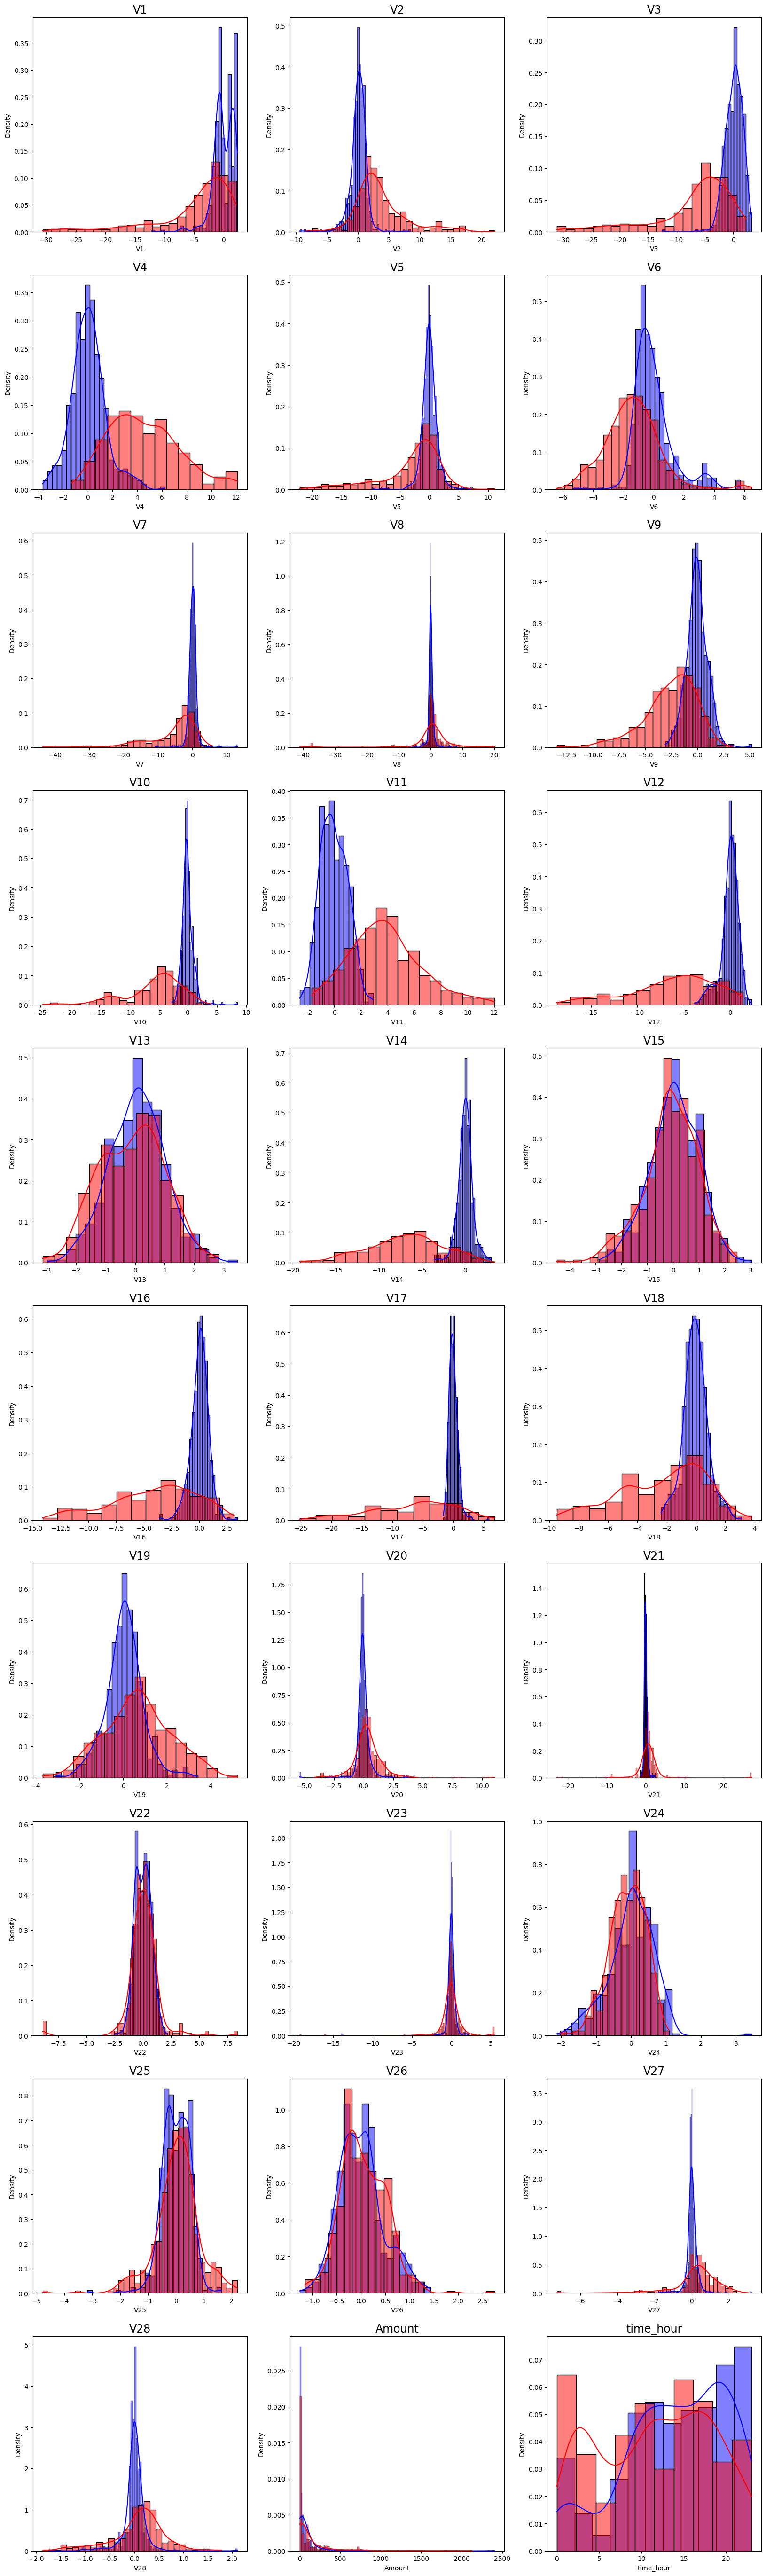

In [171]:
normal_entries = new_df.Class==0
fraud_entries = new_df.Class==1

plt.figure(figsize=(20,70))
for n, col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.histplot(x[col][normal_entries], color='blue', kde = True, stat = 'density')
    sns.histplot(x[col][fraud_entries], color='red', kde = True, stat = 'density')
    plt.title(col, fontsize=17)
plt.show()

In [172]:
# model evaluation
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
pred_test = model.predict(x_test)

In [173]:
# accuracy on training data
acc_score= round(accuracy_score(y_pred, y_train)*100,2)
print('The accuracy score for training data of our model is :', acc_score)

The accuracy score for training data of our model is : 94.85


In [174]:
y_pred = model.predict(x_test)
acc_score = round(accuracy_score(y_pred, y_test)*100,2)
print('The accuracy score of our model is :', acc_score)

The accuracy score of our model is : 92.28


In [175]:
score = round(model.score(x_test, y_test)*100,2)
print('Score of our model is :', score)

Score of our model is : 92.28


In [176]:
class_report = classification_report(y_pred, y_test)
print(class_report)
print('Classification report of our model')

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       130
           1       0.89      0.95      0.92       116

    accuracy                           0.92       246
   macro avg       0.92      0.92      0.92       246
weighted avg       0.92      0.92      0.92       246

Classification report of our model
